## Exercise:

This example is sourced from the [Scipy website](https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/) where you can find more details. For more on these models and their variations, see [Compartmental models in epidimiology, Wikipedia](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology).

Numerically solve the SIR epidemic model:

1. In pure Python using for loops to integrate in time.
1. Using Scipy's odeint package. 

The differential equations that describe the model are:

\begin{equation}
\frac{dS}{dt} = \frac{-\beta I S}{N}
\end{equation}

\begin{equation}
\frac{dI}{dt} = \frac{\beta I S}{N} - \gamma I
\end{equation}

\begin{equation}
\frac{dR}{dt} = \gamma I
\end{equation}

Where S are the susceptible numbers in the population, I is the number of infected, R is the number of recovered persons in the population. $\beta$ is the *effective contact rate*, that is, an infected individual comes into contact with $\beta N$ individuals. $\gamma$ is the mean recovery rate: $1/\gamma$ is the mean period of time that an individual can pass on the infection.

A vitally important number to keep track of is the ratio: $R_0 = \beta/\gamma$; when $R_0 \gt 1$, the disease spreads through the population, when $R_0 \lt 1$, the disease quickly dies out.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
N = 1000
Rec0 = 0
Inf0 = 1
Sus0 = N - Inf0

In [52]:
beta = 0.2
gamma = 0.1
R0 = beta/gamma

In [53]:
R0

2.0

In [58]:
Sus = [Sus0]
Rec = [Rec0]
Inf = [Inf0]
for t in range(150):
    delta_S = -beta * Inf[-1] * Sus[-1] / N
    Sus.append(Sus[-1]+delta_S)
    
    delta_I = beta * Inf[-1] * Sus[-1] / N - gamma * Inf[-1]
    Inf.append(Inf[-1] + delta_I)
    
    delta_R = gamma * Inf[-1]
    Rec.append(Rec[-1] + delta_R)
    #print(delta_S, delta_I, delta_R)

In [59]:
Sus = np.array(Sus)
Rec = np.array(Rec)
Inf = np.array(Inf)

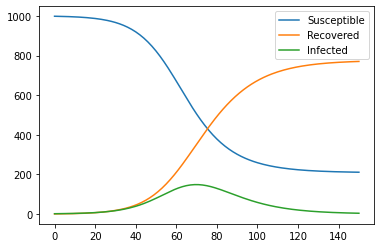

In [60]:
plt.plot(np.arange(151), Sus, label="Susceptible")
plt.plot(np.arange(151), Rec, label="Recovered")
plt.plot(np.arange(151), Inf, label="Infected")
plt.legend()

In [61]:
from scipy.integrate import odeint

In [62]:
# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [63]:
# Initial conditions vector
y0 = Sus0, Inf0, Rec0
# Integrate the SIR equations over the time grid, t.
t = np.arange(150)
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T


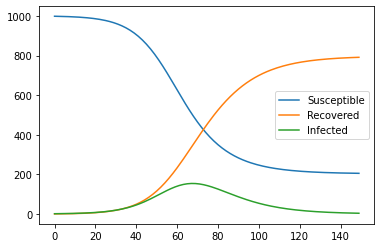

In [66]:
plt.plot(np.arange(150), S, label="Susceptible")
plt.plot(np.arange(150), R, label="Recovered")
plt.plot(np.arange(150), I, label="Infected")
plt.legend()